In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense

from keras.models import load_model

import matplotlib.pyplot as plt
import warnings

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

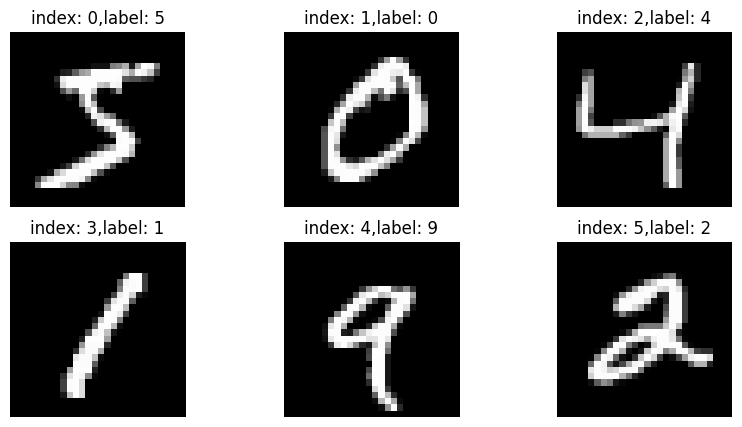

In [12]:
plt.figure(figsize=(10,5))

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(f"index: {i},label: {y_train[i]}")
  plt.axis("off")
plt.show()

In [13]:
# veri setini normalize ediyoruz, 0-255 aralığındaki pizel değerlerini 0-1 arasına ölçekliyoruz
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2])).astype('float32')/255
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[2])).astype('float32')/255

In [14]:
# etiketleri kategorik hale çevir (0-9 arasındaki rakamları one-hot encoding yapıyoruz)
y_train = to_categorical(y_train,10) # 10 sınıf sayısı
y_test = to_categorical(y_test,10)


In [15]:
model = Sequential()

# ilk katman 512 cell,Relu activation function, input size 28*28=784
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
#ikinci katman 256 cell , activation=tanh
model.add(Dense(256,activation='tanh'))
#üçüncü katman 10 tane olmak zorunda, activation softmax
model.add(Dense(10,activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# model derlemesi: optimizer (adam: büyük veri vve kompleks ağlar için ideal)
# model derlemesi: loss(categorical_crossentropy)
# model derlemesi: metrik(accuracy)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
# Erken durdurma: eger val_loss iyileşmiyorsa eğitimi durdur
# monitor: doğrulama setindeki (val) kaybı (loss) izler
# petience: 3 -> 3 epoch boyunca val loss değişmiyorsa erken durdurma yapalım
# restore_best_weights: en iy imodelin ağırlıklarını geri yükler

early_stopping = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [18]:
# model checkpoint: en iyi modelin agırlıklarını kaydeder
# save_best_only: sadece en iyi performans gösteren modeli kaydeder

checkpoint= ModelCheckpoint('ann_best_model.h5',monitor="val_loss",save_best_only=True)

In [21]:
# model training: 10 epochs, batch size = 60, doğrulama seti oranı = %20
# model 60000 veri setini her biri 60 parçadan oluşan 1000 kere train edecek ve biz buna 1 epoch diyeceğiz
# ama validasyon ayrımı yaptığımız için aslında 60000 train verisi değilde 4800 train verisi var bu nedenle her biri 60 parçadan oluşan 800 kere train yapacak
history = model.fit(x_train,y_train, # train veri seti
                    epochs=10, # model toplamda 10 kere veri setini görecek yane ver iseti 10 kere eğitilecek
                    batch_size=60, # veri seti 60'arlı parçalar ile eğitim yapacak
                    validation_split=0.2,# eğitim verisinin %20'si doğrulama olarak kullanılacak
                    callbacks=[early_stopping,checkpoint])

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9920 - loss: 0.0222 - val_accuracy: 0.9740 - val_loss: 0.1037
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9949 - loss: 0.0178 - val_accuracy: 0.9767 - val_loss: 0.1037
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9966 - loss: 0.0101 - val_accuracy: 0.9770 - val_loss: 0.1010
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9960 - loss: 0.0115 - val_accuracy: 0.9772 - val_loss: 0.1041
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9964 - loss: 0.0107 - val_accuracy: 0.9769 - val_loss: 0.1067
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9978 - loss: 0.0079 - val_accuracy: 0.9718 - val_loss: 0.1410


In [22]:
# test verisi ile model performansı değerlendirme
# evaluate: modelin test veris üzerindeki loss (test_loss) ve accuracy (test_acc) hesaplar
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9732 - loss: 0.1058
Test Loss: 0.0835
Test Accuracy: 0.9786


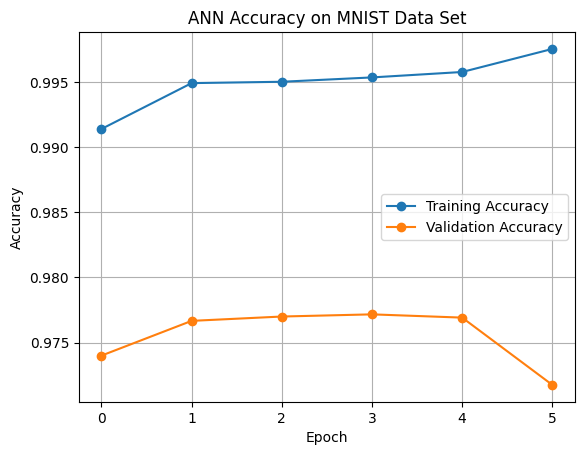

In [24]:
 # training and validation accuracy görselleştirme
plt.figure()
plt.plot(history.history['accuracy'],marker="o",label='Training Accuracy')
plt.plot(history.history['val_accuracy'],marker="o",label='Validation Accuracy')
plt.title("ANN Accuracy on MNIST Data Set")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

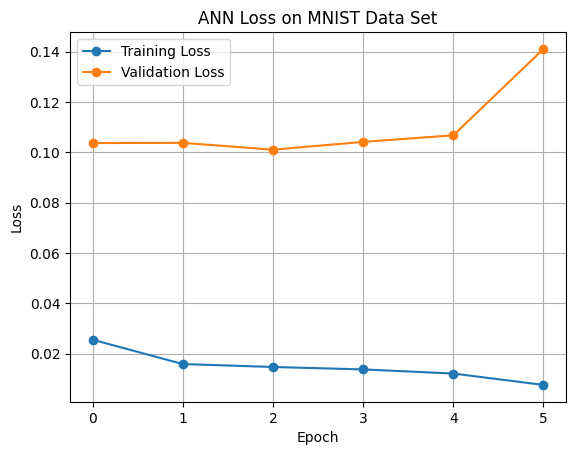

In [25]:
# training and validation loss görselleştirme
plt.figure()
plt.plot(history.history['loss'],marker="o",label='Training Loss')
plt.plot(history.history['val_loss'],marker="o",label='Validation Loss')
plt.title("ANN Loss on MNIST Data Set")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
#modeli kaydetme
model.save("final_mnist_ann_model.h5")

In [27]:
loaded_model = load_model("final_mnist_ann_model.h5")

In [28]:
test_loss,test_acc = loaded_model.evaluate(x_test,y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9732 - loss: 0.1058
Test Loss: 0.0835
Test Accuracy: 0.9786
